**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Importing Datasets**

In [2]:
calories=pd.read_csv("/content/calories.csv")

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data=pd.read_csv("/content/exercise.csv")

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Combining two dataframes**

In [6]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
calories_data.shape

(15000, 9)

In [9]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
calories_data.isnull()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [11]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


**Data Analysis**

In [12]:
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data** **Visualization**

In [13]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

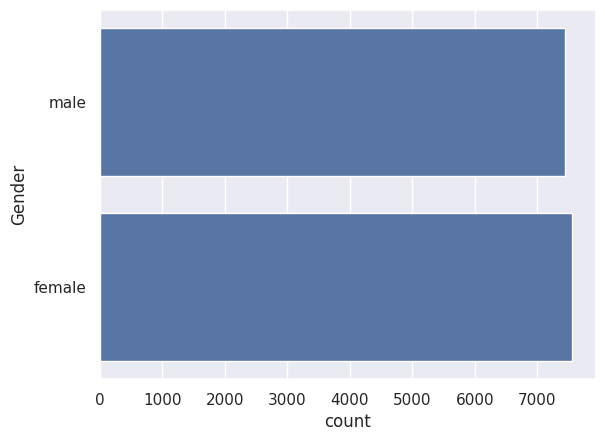

In [14]:
#plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-15-87f38b03d3f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

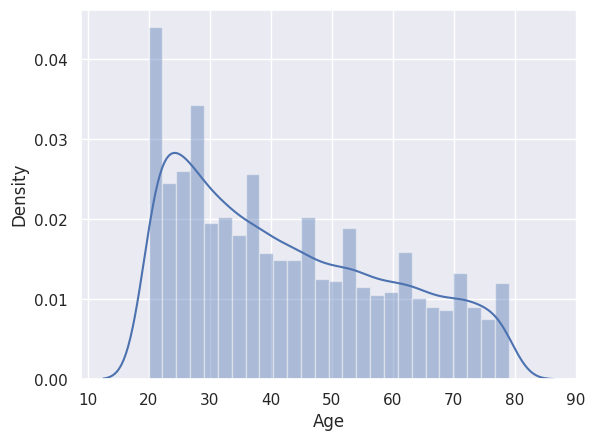

In [15]:


#finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-16-e99eacb89d14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

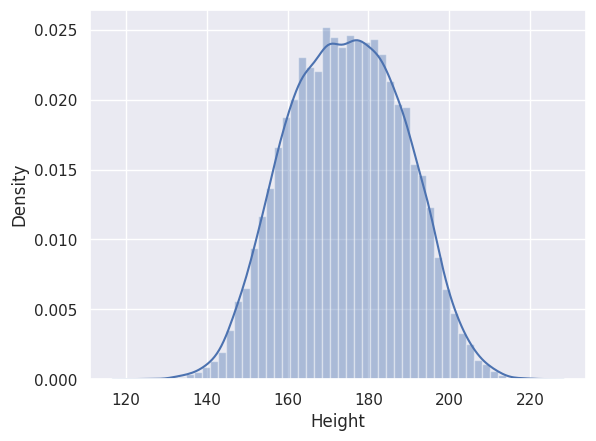

In [16]:
#finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-17-f436dc838327>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

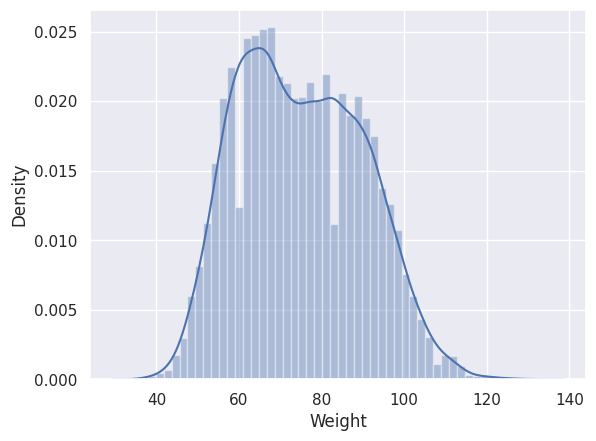

In [17]:
#finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Data preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [19]:
# Encode labels in column 'Gender'.
calories_data['Gender']= label_encoder.fit_transform(calories_data['Gender'])

In [20]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Finding the Correlation in the dataset

1.   Positive Correlation
2.   Negative Correlation



In [21]:
correlation = calories_data.corr()

<Axes: >

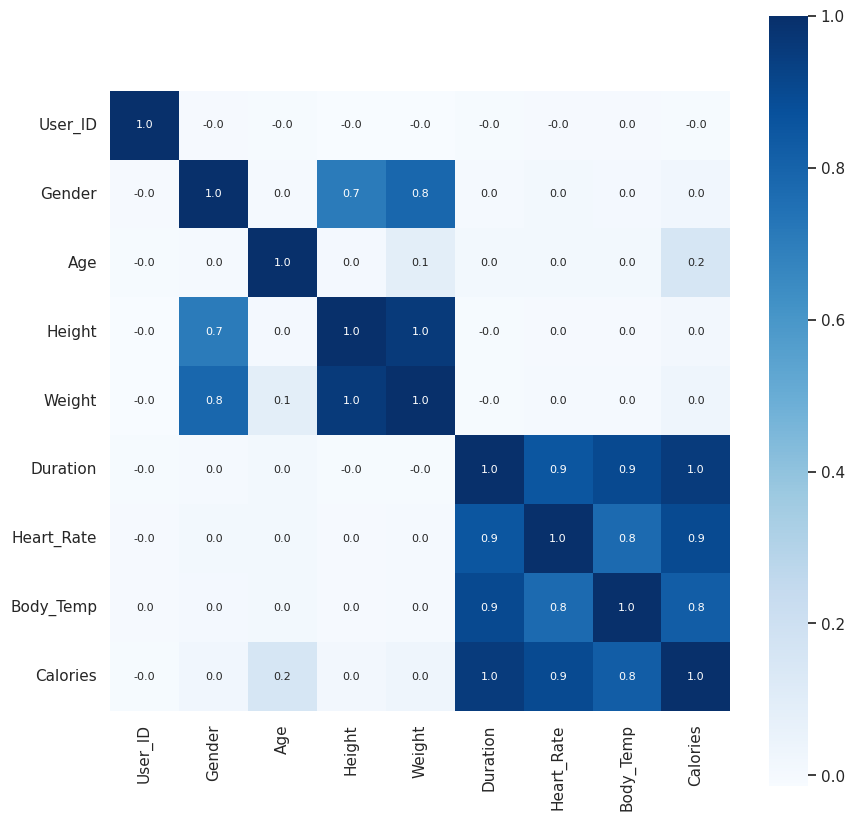

In [22]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')


**Separating Feature and Target**

In [23]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']

In [24]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [25]:
Y

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14995,45.0
14996,23.0
14997,75.0
14998,11.0


Splitting the data into training data and test data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
X.shape

(15000, 7)

In [28]:
Y.shape

(15000,)

In [29]:
X_train.shape

(12000, 7)

In [30]:
X_test.shape

(3000, 7)

**Model Selection**

In [31]:
#LinearRegression
model = LinearRegression()

In [32]:
model.fit(X_train,Y_train)

LinearRegression()

Prediction on test data

In [33]:
test_data_prediction = model.predict(X_test)

In [34]:
test_data_prediction

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

**Model Evaluation**

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, R² Score: {r2}')

MSE: 130.08707386188382, RMSE: 11.40557205325028, R² Score: 0.9668790377181355


**Comparison of Actual and Predicted Calories Burned**

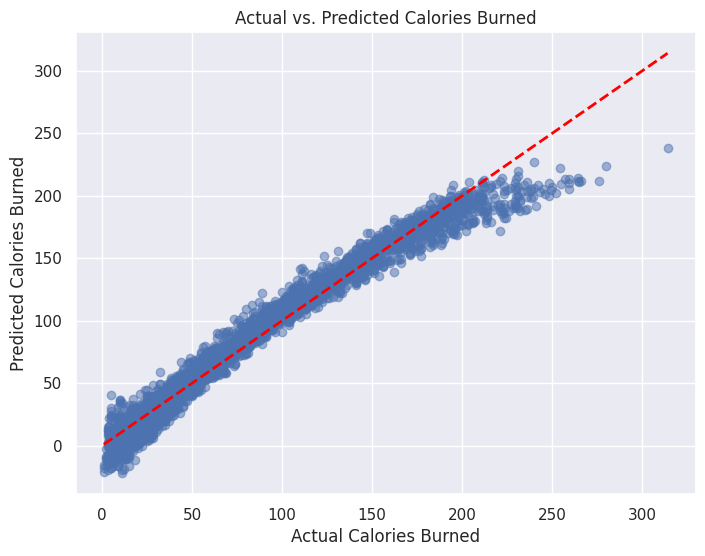

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned')
plt.show()

**Residual Analysis to Evaluate Model Accuracy**

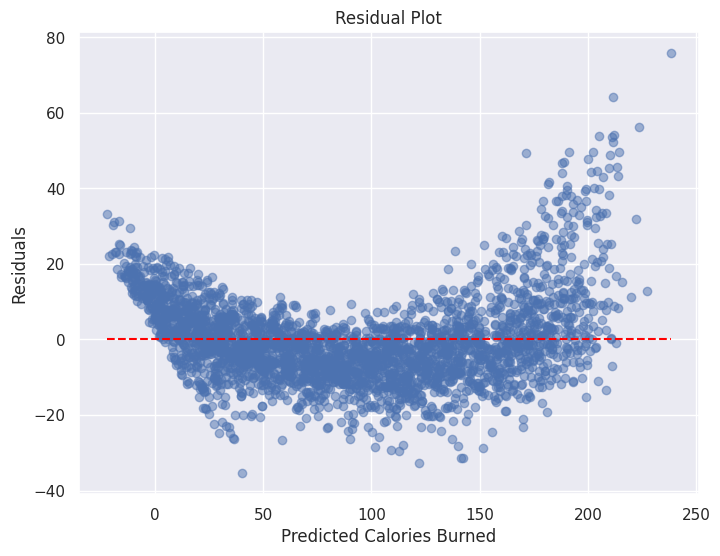

In [37]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), color='red', linestyle='--')
plt.xlabel('Predicted Calories Burned')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Test Input

In [38]:
#Gender,Age,Height(cm),Weight(kg),Duration(min),Heart_Rate(bpm),Body_Temp(C)
# 1 for Male , 0 for Female
user_input = [[1,51,190,94,29,105,35]]
predict_calories_burnt = model.predict(user_input)
print("Predicted Calories Burned: ",predict_calories_burnt)

Predicted Calories Burned:  [290.05633397]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
import pickle
pickle.dump(model,open("predictor.pkl","wb"))